<a href="https://colab.research.google.com/github/faridLim/Data-analysis/blob/main/StrategyScore_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [197]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt

In [216]:
start_date = '2018-12-28'
end_date = '2021-05-31'
needed_date = '2017-12-05'

In [199]:
df_stock = pd.read_excel("/content/gdrive/Shareddrives/mirae/data/data/etf_close.xlsx", index_col = 0)
df_volume = pd.read_excel("/content/gdrive/Shareddrives/mirae/data/data/etf_volume.xlsx", index_col = 0)

In [200]:
df_volume = df_volume.fillna(0)

In [201]:
columns_lst = df_stock.columns
date = df_stock.T.columns
date_list = []
score_list = []

In [202]:
date

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-06-10', '2021-06-11', '2021-06-14', '2021-06-15',
               '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21',
               '2021-06-22', '2021-06-23'],
              dtype='datetime64[ns]', name='date', length=2333, freq=None)

In [203]:
for i in range(len(date)):
    ts = date[i].date()
    date_list.append(str(ts))

start_date_idx = date_list.index('2018-12-28')
end_date_idx = date_list.index('2021-05-31')

In [204]:
df_high52= pd.DataFrame()
for i in range(columns_lst.shape[0]):
    high52 = df_stock[columns_lst[i]].asfreq('D').rolling(window=52 * 7, min_periods=1).max()
    df_high52[columns_lst[i]] = high52

In [205]:
df_merge = pd.merge(df_stock,df_high52, how= 'left', on = 'date')
df_merge = df_merge.filter(regex = '_y')
df_merge.columns = columns_lst
#df_merge.to_excel('etf_high52.xlsx')

In [206]:
boxScore_df = pd.DataFrame(columns= columns_lst)
gapScore_df = pd.DataFrame(columns= columns_lst)
volumeScore_df = pd.DataFrame(columns= columns_lst)

In [207]:
boxScore_lis = []
gapScore_lst = []
volumeScore_lst = []

In [208]:
def high52_check():
    avg_stockprice = df_stock[name][start_date_idx-2-260:start_date_idx-2].mean()

    before3month_df_stock = df_stock.iloc[start_date_idx - 20 *3 :start_date_idx-1][name]
    before3month_df_merge = df_merge.iloc[start_date_idx - 20 *3 :start_date_idx-1][name]

    before3month_df_stock = pd.DataFrame(before3month_df_stock)
    before3month_df_merge = pd.DataFrame(before3month_df_merge)
    df_filter1 = pd.concat([before3month_df_stock, before3month_df_merge], axis =1)
    df_filter1.columns= ['close', '52high']
    df_filter1.reset_index(inplace = True)

    for i in range(df_filter1.shape[0]):
    
        if df_filter1.loc[i, 'close'] < df_filter1.loc[i, '52high'] and avg_stockprice < df_filter1.loc[i, 'close']:
            box_point.append(1)
        else:
            box_point.append(-1)

    df_filter1['box_point'] = box_point
    sum_box_point = sum(box_point)
    c.append([name,sum_box_point])
    # sorted_c_list = sorted(c, key=lambda x: -x[1])
    box_point.clear()

main

In [209]:
for date_idx in range(start,len(date_list)):
    i = 0
    a = [] # df_high52 만들 때 사용
    b = [] # 52주 신고가 여력 트리거
    c = [] # point 계산
    box_point = []
    point_vol = [] # volume에 대한 point
    filter2_columns_lst = [] # 필터링2 이후 리스트
    gap_list = [] # 52주 신고가 대비 현재 주가가 얼마나 근접하였는지
    filter3_columns_lst = [] # 필터링 3 이후 리스트, 필터링 2를 MDD기준으로 내림차순 전개

    #52_check , boxscore
    for k in range(len(columns_lst)):
        b.clear()
        name = columns_lst[k]
        for i in range(100): # 20일 x 5개월
            after_value = df_merge.iloc[start_date_idx-i-1][name]
            before_value = df_merge.iloc[start_date_idx-1-i-1][name]
            if after_value != before_value:
                b.append(1)
        if 1 in b:
            high52_check()
        else:
            c.append([name,-50])


    box_score = c
    
    #gap score
    for i in range(len(columns_lst)):
        high = df_merge[columns_lst[i]][start_date_idx-2]
        close_price = df_stock[columns_lst[i]][start_date_idx-1]
        gap = (high-close_price) / high
        gap_list.append([columns_lst[i],gap])

    
    #volume score
    for i in range(len(columns_lst)):
        if df_volume[columns_lst[i]][start_date_idx] == 0:
            vol_point = 0
            point_vol.append([columns_lst[i], vol_point])
            continue
        
        for k in range(260): # 52주 x 5일
            after_value_idx = start_date_idx-4-k
            after_value = df_merge.iloc[after_value_idx][columns_lst[i]]
            before_value = df_merge.iloc[after_value_idx-1][columns_lst[i]]
            if after_value != before_value:
                A_vol = df_volume[columns_lst[i]][after_value_idx-2] +  df_volume[columns_lst[i]][after_value_idx-1]+  df_volume[columns_lst[i]][after_value_idx] +  df_volume[columns_lst[i]][after_value_idx+1]+  df_volume[columns_lst[i]][after_value_idx+2]
                filter_vol = df_volume[columns_lst[i]][start_date_idx-1]

                if A_vol > filter_vol > A_vol * 0.5:
                    vol_point = 2
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if A_vol * 0.5 > filter_vol:
                    vol_point = 1
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if filter_vol > A_vol:
                    vol_point = 0
                    point_vol.append([columns_lst[i], vol_point])
                    break
            
    
    #box scrore 정규화#
    
    boxscore_df = pd.DataFrame(box_score)
    boxscore_df.columns = ['name', date_list[date_idx]]
    box_mean = boxscore_df.describe().at['mean', date_list[date_idx]]
    box_std = boxscore_df.describe().at['std', date_list[date_idx]]
    boxscore_df[date_list[date_idx]] = (boxscore_df[date_list[date_idx]] - box_mean) / box_std
    boxscore_df.set_index('name', inplace = True)
    boxscore_df = boxscore_df.T

    #gap_score 정규화#
    gapscore_df = pd.DataFrame(gap_list)
    gapscore_df.columns = ['name', date_list[date_idx]]
    gapscore_mean = gapscore_df.describe().at['mean', date_list[date_idx]]
    gapscore_std = gapscore_df.describe().at['std', date_list[date_idx]]
    gapscore_df[date_list[date_idx]] = (gapscore_df[date_list[date_idx]] - gapscore_mean) / gapscore_std

    gapscore_df.set_index('name', inplace = True)
    gapscore_df = gapscore_df.T

    #point_vol 정규화#
    point_vol_df = pd.DataFrame(point_vol)
    point_vol_df.columns = ['name', date_list[date_idx]]
    point_vol_mean = point_vol_df.describe().at['mean', date_list[date_idx]]
    point_vol_std = point_vol_df.describe().at['std', date_list[date_idx]]
    if point_vol_std == 0:
        point_vol_df[date_list[date_idx]] = 0
    else:
        point_vol_df[date_list[date_idx]] = (point_vol_df[date_list[date_idx]] - point_vol_mean) / point_vol_std

    point_vol_df.set_index('name', inplace = True)
    point_vol_df = point_vol_df.T

    score_df = boxscore_df - gapscore_df + point_vol_df
    score_df = score_df.T

    score_list.append(score_df)
        

In [210]:
score_list = pd.concat(score_list, axis = 1)
score_t = score_list.T
score_t.tail()

name,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
2021-06-17,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-21,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-22,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-23,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
score_t.to_excel("/content/gdrive/Shareddrives/mirae/외부데이터/score_T(2).xlsx")

기간별 스코어파악

In [212]:
score = pd.read_excel('/content/gdrive/Shareddrives/mirae/외부데이터/score_T(2).xlsx')

In [215]:
score.head()

,Unnamed: 0,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
0,2019-01-02,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
score.index = pd.to_datetime(score["Unnamed: 0"])
score.drop(["Unnamed: 0"],axis=1,inplace = True)

In [219]:
daily_score = score.iloc[:, ]
daily_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
daily_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/daily_score(2).csv")

In [221]:
weekly_score = score.resample('W').last().iloc[:, ]
weekly_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-06,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-13,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-27,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-03,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
weekly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/weekly_score(2).csv")

In [223]:
monthly_score = score.resample('M').last().iloc[:, ]
monthly_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,-0.255047,-3.704129,3.476957,-0.066416,0.140347,5.00054,-0.265169,4.656485,-1.497635,-2.286528,2.191541,0.289758,0.607739,-0.143221,0.429021,0.218276,2.964058,-0.796198,-0.236146,-0.394541,-0.297049,0.093214,-0.02631,-0.028841,0.65294,1.42181,-0.524992,-0.11586,0.243859,2.057859,-0.108483,-1.036175,0.18582,0.14502,-1.530607,3.341568,3.98168,-0.988568,-0.05613,0.065296,...,0.136199,-1.802217,0.201914,-0.935929,0.011973,2.253356,3.117367,0.485715,1.700277,2.115077,5.460774,2.747655,1.038605,1.818899,0.292332,1.453665,1.345253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
monthly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/monthly_score(2).csv")

magi_module

In [225]:
def sig_to_weight(sig_series, long_sig, short_sig, weight):
    long_count = (sig_series == long_sig).sum()
    short_count = (sig_series == short_sig).sum()
    
    if (long_count != 0) & (short_count != 0):
        sig_series.loc[(sig_series != long_sig) & (sig_series != short_sig)] = np.NaN
        sig_series.loc[sig_series == long_sig] = weight / long_count
        sig_series.loc[sig_series == short_sig] = -1. * weight / short_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def get_ic(ret_1m, scores):
    ret_ = ret_1m.reindex(scores.index, columns=scores.columns).loc[scores.index].values
    numbers = scores.count(1).values
    scor = scores.values

    dates = scores.index

    scor = np.expand_dims(scor, -1)
    ret_ = np.expand_dims(ret_, -1)

    cal_ic = np.concatenate([scor, ret_], axis=-1)

    cov = np.nansum(np.prod(cal_ic - np.nanmean(cal_ic, 1, keepdims=True), 2), 1)

    ic = cov / np.nanstd(cal_ic, 1).prod(-1) / numbers
    return pd.DataFrame(ic, columns=['IC'], index=dates)

def build_rank_port(scores):
    """
    결과값 scores가 들어가면 rank_port 생성
    percent_rank를 기준으로 abosolute deviation 기준으로 normalize하고
    2를 곱해 LONG/SHORT이 각각 1이 되도록 조정한 롱숏 포트폴리오 생성

    params: scores : 모델 결과값
    """
    pct_rank = scores.rank(1, pct=True).T  # , method = 'max').T

    rank_port = pct_rank - pct_rank.mean()

    rank_port = (rank_port / rank_port.abs().sum()).T * 2
    return rank_port


def get_report(score):
    rtn = pd.read_csv('/content/gdrive/Shareddrives/mirae/외부데이터/ret_data.csv')

    rtn = rtn.set_index('tdate')
    rtn.index = pd.to_datetime(rtn.index)
    rtn = rtn.shift(-1)
    
    score.index = pd.to_datetime(score.index)
    sig_data = score.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)

    test_cut = 5

    ress = []
    mdds = []
    turnovers = []
    cagrs = []
    sharpes = []

    for signal in range(test_cut + 2):
        if signal == test_cut:

            name = 'L-S'
            weight_sig_data = sig_data.copy().apply(sig_to_weight, axis=1, args=(test_cut - 1, 0, 1.))
        elif signal == test_cut + 1:
            weight_sig_data = build_rank_port(score.loc[sig_data.index])  # RANK_L-S
            weight_sig_data.index.name = 'tdate'
            weight_sig_data.columns.name = 'code'
        else:

            name = f'quan_{signal}'
            weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
        port = weight_sig_data.fillna(0)

        ret_data_ = rtn.loc[port.index[0]:]  # 해당 기간 맵핑
        ret_data_ = ret_data_.reindex(columns=port.columns)  # 종목 일치

        port = port.reindex(ret_data_.index, method = 'ffill')

        port_returns = (ret_data_ * port).sum(1).shift(1)

        turnover = weight_sig_data.diff()  # turnover 계산
        turnover.iloc[0] = weight_sig_data.iloc[0]

        res = (1 + port_returns.fillna(0)).cumprod()

        TO = (abs(turnover).sum(1) / 2).sum().mean()
        MDD = (res / res.cummax() - 1).min()  # MDD
        CAGR_ = res.values[-1] ** (1 / 36 / 30 * 360) - 1
        vol = np.std(res.pct_change().dropna())
        sharpe = np.mean(res.pct_change().dropna()) / np.std(res.pct_change().dropna()) * np.sqrt(12)

        sharpes.append(sharpe)
        mdds.append(MDD)
        turnovers.append(TO)
        cagrs.append(CAGR_)
        ress.append(res)
    columns = ['QUAN_{}'.format(test_cut - d) for d in range(test_cut)]
    columns += ['L-S', 'RANK_L-S']


    ress = pd.concat(ress, 1)
    ress.columns = columns

    summary = pd.DataFrame(
    [ress.iloc[-1].values,  mdds, turnovers, cagrs, sharpes],
    index=['RETURN', 'MDD', 'TURNOVER', 'CAGR', 'SHARPE'],
    columns=columns)
    return summary, ress


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.628809,1.294195,1.390608,1.419621,1.001822,0.505488,0.645322
MDD,-0.471412,-0.392826,-0.351352,-0.273435,-0.113286,-0.697726,-0.567411
TURNOVER,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000
CAGR,0.176585,0.089766,0.116182,0.123891,0.000607,-0.203406,-0.135844
SHARPE,0.195795,0.139957,0.201500,0.235902,0.009097,-0.173419,-0.156109


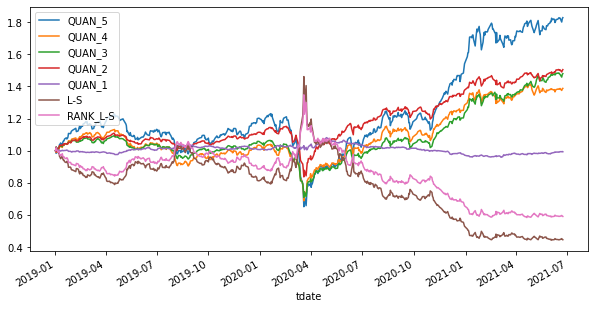

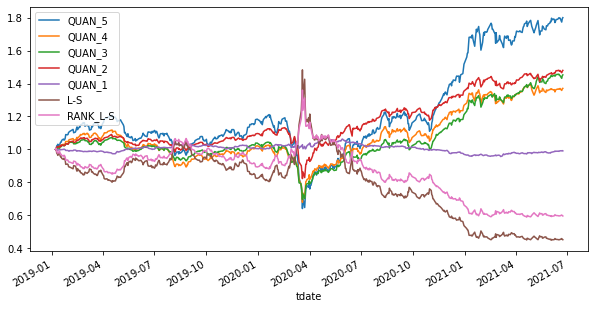

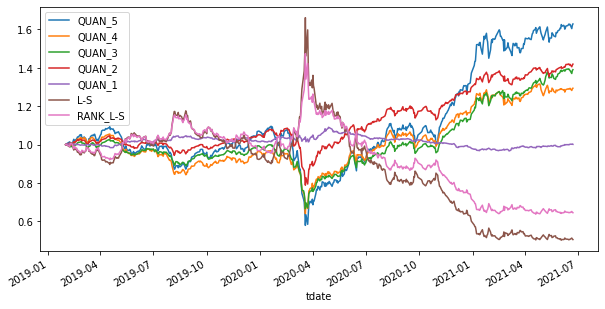

In [226]:
daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (10, 5))
daily_summary


weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (10, 5))
weekly_summary



monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (10, 5))
monthly_summary